## Importando bibliotecas utilizadas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

## Fazendo o upload e leitura da base de dados

In [2]:
df = pd.read_csv('livros_lidos.csv', sep = ',')

##### Exibindo objeto pandas dataframe 

In [3]:
df.head()

,titulo,autor,editora,idioma,genero,paginas,ano_leitura,tipo
0,LEITURA DINÂMICA: APRENDA A LER 3X MAIS RÁPIDO,Pedro Santiago,PESAFRA,portugues,autoajuda,29,2020,ebook
1,As origens da ordem política: Dos tempos pré-h...,Francis Fukuyama,Rocco Digital,portugues,filosofia,779,2020,ebook
2,Entendendo Ética: Um guia ilustrado,"Dave Robinson, Chris Garrat",Leya,portugues,filosofia,176,2020,ebook
3,Memórias póstumas de Brás Cubas,Machado de Assis,Globo Livros,portugues,romance,225,2020,ebook
4,Versos sobre amor e mulher,Fernanda França,Publicacao propria,portugues,poesia,110,2020,ebook


## Extraindo informações iniciais do dataframe

##### Overview dataframe:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   titulo       179 non-null    object
 1   autor        179 non-null    object
 2   editora      179 non-null    object
 3   idioma       179 non-null    object
 4   genero       179 non-null    object
 5   paginas      179 non-null    int64 
 6   ano_leitura  179 non-null    int64 
 7   tipo         179 non-null    object
dtypes: int64(2), object(6)
memory usage: 11.3+ KB


##### O dataframe possue as seguintes colunas:

In [5]:
df.columns

Index(['titulo', 'autor', 'editora', 'idioma', 'genero', 'paginas',
       'ano_leitura', 'tipo'],
      dtype='object')

## Quantidade de registros:

In [6]:
print(f'A base de dados é composta por {df.shape[0]} registros.')

A base de dados é composta por 179 registros.


## Tratando os itens das colunas idioma e genero

In [7]:
# Conferindo os itens que compõem a series idioma
df.idioma.unique()

array(['portugues', 'ingles', 'português'], dtype=object)

In [8]:
# Criando dicionário para substituir os itens e alterando a series com o método .map()
idiomas = {
    'portugues' : 'Português',
    'ingles' : 'Inglês',
    'português' : 'Português',
}

df.idioma = df.idioma.map(idiomas)

In [9]:
# Double check para confirmar se realmente alteramos os valores
df.idioma.unique()

array(['Português', 'Inglês'], dtype=object)

In [10]:
# Conferindo os itens que compõem a series genero
df.genero.unique()

array(['autoajuda', 'filosofia', 'romance', 'poesia', 'trade', 'fantasia',
       'economia', 'programacao', 'biografia', 'cultura', 'direito',
       'ficcao', 'linguistica', 'educacao'], dtype=object)

In [11]:
# Criando dicionário para substituir os itens e alterando a series com o método .map()
generos = {
    'autoajuda' : 'Autoajuda', 
    'filosofia' : 'Filosofia', 
    'romance' : 'Romance', 
    'poesia' : 'Poesia', 
    'trade' : 'Trade', 
    'fantasia' : 'Fantasia',
    'economia' : 'Economia', 
    'programacao' : 'Programação', 
    'biografia' : 'Biografia', 
    'cultura' : 'Cultura', 
    'direito' : 'Direito',
    'ficcao' : 'Ficção', 
    'linguistica' : 'Linguística', 
    'educacao' : 'Educação',
}

df.genero = df.genero.map(generos)

In [12]:
# Double check para confirmar se realmente alteramos os valores
df.genero.unique()

array(['Autoajuda', 'Filosofia', 'Romance', 'Poesia', 'Trade', 'Fantasia',
       'Economia', 'Programação', 'Biografia', 'Cultura', 'Direito',
       'Ficção', 'Linguística', 'Educação'], dtype=object)

##### Deixando apenas a primeira letra de cada series como maiúsucla

In [13]:
# Transformando cada series de object para string e aplicando o método .capitalize() do pandas
df['idioma'] = pd.Series(df['idioma'], dtype = 'string').str.capitalize()
df['genero'] = pd.Series(df['genero'], dtype = 'string').str.capitalize()
df['tipo'] = pd.Series(df['tipo'], dtype = 'string').str.capitalize()

In [14]:
# O método .title() do pandas coloca em maiúscula a primeira letra de todas as palavras
df['titulo'] = pd.Series(df['titulo'], dtype = 'string').str.title()
df['autor'] = pd.Series(df['autor'], dtype = 'string').str.title()
df['editora'] = pd.Series(df['editora'], dtype = 'string').str.title()

In [15]:
# Confirmando que as series tiveram seu tipo de dados alterados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   titulo       179 non-null    string
 1   autor        179 non-null    string
 2   editora      179 non-null    string
 3   idioma       179 non-null    string
 4   genero       179 non-null    string
 5   paginas      179 non-null    int64 
 6   ano_leitura  179 non-null    int64 
 7   tipo         179 non-null    string
dtypes: int64(2), string(6)
memory usage: 11.3 KB


In [16]:
# Confirmando se o método .capitalize() realmente funcionou
df.head()

,titulo,autor,editora,idioma,genero,paginas,ano_leitura,tipo
0,Leitura Dinâmica: Aprenda A Ler 3X Mais Rápido,Pedro Santiago,Pesafra,Português,Autoajuda,29,2020,Ebook
1,As Origens Da Ordem Política: Dos Tempos Pré-H...,Francis Fukuyama,Rocco Digital,Português,Filosofia,779,2020,Ebook
2,Entendendo Ética: Um Guia Ilustrado,"Dave Robinson, Chris Garrat",Leya,Português,Filosofia,176,2020,Ebook
3,Memórias Póstumas De Brás Cubas,Machado De Assis,Globo Livros,Português,Romance,225,2020,Ebook
4,Versos Sobre Amor E Mulher,Fernanda França,Publicacao Propria,Português,Poesia,110,2020,Ebook


##### Tornando os títulos das colunas melhores

In [17]:
# Confirmando os títulos de cada series que compõem o dataframe
df.columns

Index(['titulo', 'autor', 'editora', 'idioma', 'genero', 'paginas',
       'ano_leitura', 'tipo'],
      dtype='object')

In [18]:
# Criando um dicionário para substituirmos os títulos
renomeia_titulos = {
    'titulo' : 'Obra', 
    'autor' : 'Autor(a)', 
    'editora' : 'Editora', 
    'idioma' : 'Idioma', 
    'genero' : 'Gênero', 
    'paginas' : 'Páginas',
    'ano_leitura' : 'Lido', 
    'tipo' : 'Tipo',
}

In [19]:
# Substituindo os títulos com o dicionário criado
livros_lidos = df.rename(columns = renomeia_titulos)

In [60]:
# Confirmando o resultado
livros_lidos.head()

,Obra,Autor(a),Editora,Idioma,Gênero,Páginas,Lido,Tipo
0,Leitura Dinâmica: Aprenda A Ler 3X Mais Rápido,Pedro Santiago,Pesafra,Português,Autoajuda,29,2020,Ebook
1,As Origens Da Ordem Política: Dos Tempos Pré-H...,Francis Fukuyama,Rocco Digital,Português,Filosofia,779,2020,Ebook
2,Entendendo Ética: Um Guia Ilustrado,"Dave Robinson, Chris Garrat",Leya,Português,Filosofia,176,2020,Ebook
3,Memórias Póstumas De Brás Cubas,Machado De Assis,Globo Livros,Português,Romance,225,2020,Ebook
4,Versos Sobre Amor E Mulher,Fernanda França,Publicacao Propria,Português,Poesia,110,2020,Ebook


## Calculando o total de páginas lidas durante todo o período

In [21]:
total_pg_lida = df['paginas'].sum()
print(f'De 2020 até 2022 foram lidas {total_pg_lida} páginas.')

De 2020 até 2022 foram lidas 32176 páginas.


## Análise descritiva dos dados relativos aos idiomas dos livros lidos

##### Comparação entre a quantidade de livros lidos em portugês e inglês durante todo o período analisado.

Em todo o período foram lidos aproximadamente de 140 obras no idioma portugês e 40 em inglês.

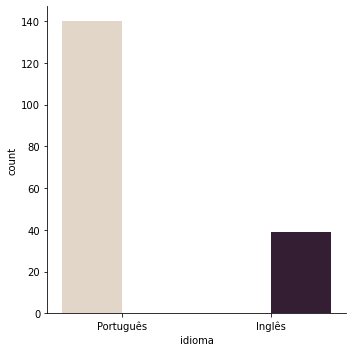

In [40]:
idiomas_cat = sns.catplot(data=df, x='idioma', kind='count', hue='idioma', palette='ch:.25')

##### Comparação entre a quantidade de livros lidos em portugês e inglês durante separado por ano de leitura.

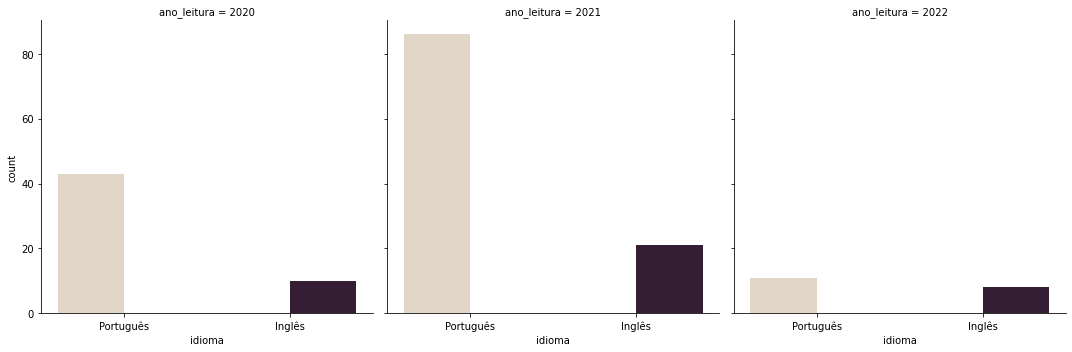

In [45]:
idioma_ano_cat = sns.catplot(data=df, x='idioma', kind='count', hue='idioma', col='ano_leitura', palette='ch:.25')

## Análise descritiva acerca do genêro dos livros lidos utilizando tabulação dos dados

##### Durante todo o período analisado este o ranking dos gêneros mais lidos é:
    1)  Trade;
    2)  Filosofia;
    3)  Programação;
    4)  Direito;
    5)  Autoajuda;
    6)  Economia;
    7)  Poesia;
    8)  Ficção;
    9)  Educação;
    10) Romance;
    11) Cultura;
    12) Biografia;
    13) Fantasia;
    14) Linguística.
    
    

###### Classificação da quantidade de livros agrupadas por gênero da obra e ano de leitura.

In [54]:
genero = df.groupby(['genero']).describe()
genero

paginas                                                        \
              count        mean         std    min     25%    50%     75%   
genero                                                                      
Autoajuda      15.0  126.400000   79.652639   29.0   66.50  101.0  186.50   
Biografia       2.0  280.500000  313.248304   59.0  169.75  280.5  391.25   
Cultura         2.0  150.000000  130.107648   58.0  104.00  150.0  196.00   
Direito        29.0  216.241379  222.199662   17.0   98.00  162.0  235.00   
Economia       11.0  199.363636  116.532633   46.0  104.50  212.0  265.50   
Educação        3.0  107.666667   57.422411   59.0   76.00   93.0  132.00   
Fantasia        2.0  490.500000   50.204581  455.0  472.75  490.5  508.25   
Ficção          4.0  288.250000   81.147499  171.0  267.00  315.0  336.25   
Filosofia      31.0  170.870968  155.125270   33.0   60.00  121.0  210.00   
Linguística     1.0  336.000000         NaN  336.0  336.00  336.0  336.00   
Poesia          5.0  137.200000   88.117535   54.0   65.00  110.0  201.00   
Programação    30.0  147.800000   77.070680   34.0  100.25  152.0  171.00   
Romance         3.0  189.000000   61.489837  118.0  171.00  224.0  224.50   
Trade          41.0  175.073171  144.536049   14.0   52.00  148.0  237.00   

                   ano_leitura                                          \
               max       count         mean       std     min      25%   
genero                                                                   
Autoajuda    299.0        15.0  2020.600000  0.632456  2020.0  2020.00   
Biografia    502.0         2.0  2021.000000  0.000000  2021.0  2021.00   
Cultura      242.0         2.0  2021.000000  0.000000  2021.0  2021.00   
Direito      986.0        29.0  2021.000000  0.000000  2021.0  2021.00   
Economia     389.0        11.0  2021.000000  0.000000  2021.0  2021.00   
Educação     171.0         3.0  2022.000000  0.000000  2022.0  2022.00   
Fantasia     526.0         2.0  2020.500000  0.707107  2020.0  2020.25   
Ficção       352.0         4.0  2021.000000  0.000000  2021.0  2021.00   
Filosofia    779.0        31.0  2020.387097  0.495138  2020.0  2020.00   
Linguística  336.0         1.0  2021.000000       NaN  2021.0  2021.00   
Poesia       256.0         5.0  2020.000000  0.000000  2020.0  2020.00   
Programação  390.0        30.0  2021.500000  0.508548  2021.0  2021.00   
Romance      225.0         3.0  2020.333333  0.577350  2020.0  2020.00   
Trade        548.0        41.0  2020.536585  0.504854  2020.0  2020.00   

                                      
                50%      75%     max  
genero                                
Autoajuda    2021.0  2021.00  2022.0  
Biografia    2021.0  2021.00  2021.0  
Cultura      2021.0  2021.00  2021.0  
Direito      2021.0  2021.00  2021.0  
Economia     2021.0  2021.00  2021.0  
Educação     2022.0  2022.00  2022.0  
Fantasia     2020.5  2020.75  2021.0  
Ficção       2021.0  2021.00  2021.0  
Filosofia    2020.0  2021.00  2021.0  
Linguística  2021.0  2021.00  2021.0  
Poesia       2020.0  2020.00  2020.0  
Programação  2021.5  2022.00  2022.0  
Romance      2020.0  2020.50  2021.0  
Trade        2021.0  2021.00  2021.0

In [66]:
genero_ano = df.groupby(['genero', 'ano_leitura']).describe() 
genero_ano

paginas                                                \
                          count        mean         std    min     25%    50%   
genero      ano_leitura                                                         
Autoajuda   2020            7.0   85.857143   49.693824   29.0   46.50   96.0   
            2021            7.0  178.000000   79.448096   83.0  112.50  200.0   
            2022            1.0   49.000000         NaN   49.0   49.00   49.0   
Biografia   2021            2.0  280.500000  313.248304   59.0  169.75  280.5   
Cultura     2021            2.0  150.000000  130.107648   58.0  104.00  150.0   
Direito     2021           29.0  216.241379  222.199662   17.0   98.00  162.0   
Economia    2021           11.0  199.363636  116.532633   46.0  104.50  212.0   
Educação    2022            3.0  107.666667   57.422411   59.0   76.00   93.0   
Fantasia    2020            1.0  455.000000         NaN  455.0  455.00  455.0   
            2021            1.0  526.000000         NaN  526.0  526.00  526.0   
Ficção      2021            4.0  288.250000   81.147499  171.0  267.00  315.0   
Filosofia   2020           19.0  169.315789  188.882107   43.0   60.00  108.0   
            2021           12.0  173.333333   85.077861   33.0  113.25  180.0   
Linguística 2021            1.0  336.000000         NaN  336.0  336.00  336.0   
Poesia      2020            5.0  137.200000   88.117535   54.0   65.00  110.0   
Programação 2021           15.0  153.733333   90.433454   34.0   94.00  146.0   
            2022           15.0  141.866667   63.642828   40.0  103.50  158.0   
Romance     2020            2.0  224.500000    0.707107  224.0  224.25  224.5   
            2021            1.0  118.000000         NaN  118.0  118.00  118.0   
Trade       2020           19.0  165.315789  173.713702   14.0   50.00   94.0   
            2021           22.0  183.500000  117.327279   39.0   66.50  177.5   

                                        
                            75%    max  
genero      ano_leitura                 
Autoajuda   2020         105.00  173.0  
            2021         219.50  299.0  
            2022          49.00   49.0  
Biografia   2021         391.25  502.0  
Cultura     2021         196.00  242.0  
Direito     2021         235.00  986.0  
Economia    2021         265.50  389.0  
Educação    2022         132.00  171.0  
Fantasia    2020         455.00  455.0  
            2021         526.00  526.0  
Ficção      2021         336.25  352.0  
Filosofia   2020         164.00  779.0  
            2021         236.00  286.0  
Linguística 2021         336.00  336.0  
Poesia      2020         201.00  256.0  
Programação 2021         171.00  390.0  
            2022         171.00  281.0  
Romance     2020         224.75  225.0  
            2021         118.00  118.0  
Trade       2020         205.50  548.0  
            2021         248.25  422.0

###### Classificação da quantidade de livros agrupadas por gênero da obra e idioma.

In [68]:
genero_idioma = df.groupby(['genero', 'idioma']).describe() 
genero_idioma

paginas                                                \
                        count        mean         std    min     25%    50%   
genero      idioma                                                            
Autoajuda   Inglês        1.0  101.000000         NaN  101.0  101.00  101.0   
            Português    14.0  128.214286   82.337185   29.0   58.25  102.5   
Biografia   Português     2.0  280.500000  313.248304   59.0  169.75  280.5   
Cultura     Português     2.0  150.000000  130.107648   58.0  104.00  150.0   
Direito     Inglês        1.0  102.000000         NaN  102.0  102.00  102.0   
            Português    28.0  220.321429  225.168094   17.0   92.75  166.5   
Economia    Português    11.0  199.363636  116.532633   46.0  104.50  212.0   
Educação    Português     3.0  107.666667   57.422411   59.0   76.00   93.0   
Fantasia    Português     2.0  490.500000   50.204581  455.0  472.75  490.5   
Ficção      Português     4.0  288.250000   81.147499  171.0  267.00  315.0   
Filosofia   Inglês        1.0  286.000000         NaN  286.0  286.00  286.0   
            Português    30.0  167.033333  156.273298   33.0   60.00  118.0   
Linguística Inglês        1.0  336.000000         NaN  336.0  336.00  336.0   
Poesia      Português     5.0  137.200000   88.117535   54.0   65.00  110.0   
Programação Inglês       14.0  161.285714   81.572458   41.0  111.50  169.0   
            Português    16.0  136.000000   73.475620   34.0   90.75  132.5   
Romance     Português     3.0  189.000000   61.489837  118.0  171.00  224.0   
Trade       Inglês       21.0  184.095238  150.375498   14.0   57.00  148.0   
            Português    20.0  165.600000  141.396568   39.0   51.50  124.5   

                                     ano_leitura                         \
                          75%    max       count         mean       std   
genero      idioma                                                        
Autoajuda   Inglês     101.00  101.0         1.0  2020.000000       NaN   
            Português  193.25  299.0        14.0  2020.642857  0.633324   
Biografia   Português  391.25  502.0         2.0  2021.000000  0.000000   
Cultura     Português  196.00  242.0         2.0  2021.000000  0.000000   
Direito     Inglês     102.00  102.0         1.0  2021.000000       NaN   
            Português  236.25  986.0        28.0  2021.000000  0.000000   
Economia    Português  265.50  389.0        11.0  2021.000000  0.000000   
Educação    Português  132.00  171.0         3.0  2022.000000  0.000000   
Fantasia    Português  508.25  526.0         2.0  2020.500000  0.707107   
Ficção      Português  336.25  352.0         4.0  2021.000000  0.000000   
Filosofia   Inglês     286.00  286.0         1.0  2021.000000       NaN   
            Português  202.50  779.0        30.0  2020.366667  0.490133   
Linguística Inglês     336.00  336.0         1.0  2021.000000       NaN   
Poesia      Português  201.00  256.0         5.0  2020.000000  0.000000   
Programação Inglês     176.25  390.0        14.0  2021.571429  0.513553   
            Português  169.50  290.0        16.0  2021.437500  0.512348   
Romance     Português  224.50  225.0         3.0  2020.333333  0.577350   
Trade       Inglês     277.00  540.0        21.0  2020.571429  0.507093   
            Português  217.00  548.0        20.0  2020.500000  0.512989   

                                                                 
                          min      25%     50%      75%     max  
genero      idioma                                               
Autoajuda   Inglês     2020.0  2020.00  2020.0  2020.00  2020.0  
            Português  2020.0  2020.00  2021.0  2021.00  2022.0  
Biografia   Português  2021.0  2021.00  2021.0  2021.00  2021.0  
Cultura     Português  2021.0  2021.00  2021.0  2021.00  2021.0  
Direito     Inglês     2021.0  2021.00  2021.0  2021.00  2021.0  
            Português  2021.0  2021.00  2021.0  2021.00  2021.0  
Economia    Português  2021.0  2021.00